for the sake of faster uploads, environments should be zipped up!
the original environment file was almost 0.9gb, so that would take a while to upload. Definitely can consider uploading the full thing once we're done working on a notebook.

In [13]:
import dill
dill.load_session('saved_notebook_env/neural_network.db')

In [9]:
from _Setup import *

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import metrics



In [2]:
train_data = pd.read_csv(missForestTrainFile)
test_data = pd.read_csv(missForestTestFile)

x_train = train_data.drop(columns = ['Unnamed: 0','SepsisLabel'])
y_train = train_data['SepsisLabel']
test_data = test_data.drop(columns = ['Unnamed: 0'])

In [3]:
#model = tf.keras.models.load_model('nn_regularized.keras')
#model.summary()

Old models.

In [4]:
model = Sequential()
model.add(Dense(30, activation = "relu"))
model.add(Dense(20, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(10, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [16]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])

In [17]:
model.fit(x_train, y_train, batch_size=64, epochs = 25)

Epoch 1/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 48s 2ms/step - accuracy: 0.7644 - loss: 4.5084
Epoch 2/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 44s 2ms/step - accuracy: 0.7941 - loss: 0.4966
Epoch 3/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.8007 - loss: 0.4772
Epoch 4/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8037 - loss: 0.4676
Epoch 5/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8052 - loss: 0.4608
Epoch 6/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8056 - loss: 0.4593
Epoch 7/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - accuracy: 0.8064 - loss: 0.4567
Epoch 8/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.8067 - loss: 0.4555
Epoch 9/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8062 - loss: 0.4553
Epoch 10/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 0.8065 - loss: 0.4539
Epoch 11/25
21706/21706 ━━━━━━━━━━━━━━━━━━━━ 46s 2ms/step - accuracy: 0.8070 - loss: 0.45

In [19]:
#test_data = test_data.drop(columns = ['Unnamed: 0'])
predictions = model.predict(test_data)
train_predictions = model.predict(x_train)
#binary_predictions = np.where(predictions > 0.5, 1, 0)


14512/14512 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
43411/43411 ━━━━━━━━━━━━━━━━━━━━ 58s 1ms/step


In [37]:
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
submission_file.to_csv('neural_submission_test.csv', index = False)
model.save('nn_regularized.keras')

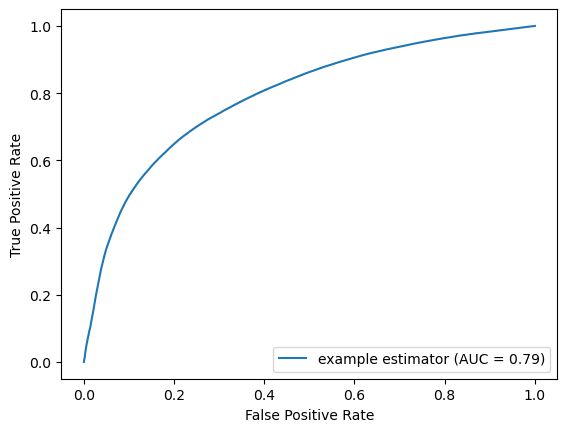

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

These are working models, in progress.

In [5]:
model = Sequential()
model.add(Dense(30, activation = "relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(20, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(10, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(4, activation = "relu", kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(1, activation = "sigmoid"))

In [6]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=10)
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=1028, epochs = 100, callbacks = [callback])

Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7554 - loss: 1.2557
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8095 - loss: 0.4758
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8107 - loss: 0.4557
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8100 - loss: 0.4523
Epoch 5/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8102 - loss: 0.4489
Epoch 6/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8109 - loss: 0.4442
Epoch 7/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8114 - loss: 0.4430
Epoch 8/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8114 - loss: 0.4409
Epoch 9/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8113 - loss: 0.4409
Epoch 10/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8106 - loss: 0.4406
Epoch 11/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8111 - loss: 0.4401
Epoch 12/100
1352/1

In [7]:
predictions = model.predict(test_data)
train_predictions = model.predict(x_train)


14512/14512 ━━━━━━━━━━━━━━━━━━━━ 11s 726us/step
43411/43411 ━━━━━━━━━━━━━━━━━━━━ 30s 702us/step


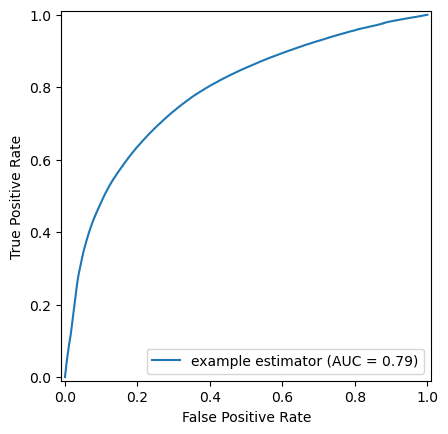

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

In [11]:
binary_predictions = np.where(predictions > 0.5, 1, 0)
submission_file = pd.read_csv(rawSubmissionFile)
submission_file['SepsisLabel'] = binary_predictions
submission_file.to_csv('model_outputs/neural_submission_test.csv', index = False)

let's try some gridsearch with cross validation

NOT WORKING CURRENTLY


In [2]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier


This one will target batch size and epochs.

In [23]:
def create_model():
	model = Sequential()
	model.add(Dense(30, activation = "relu"))
	model.add(Dense(20, activation = "relu"))
	model.add(Dense(10, activation = "relu"))
	model.add(Dense(4, activation = "relu"))
	model.add(Dense(1, activation = "sigmoid"))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [26]:
seed = 5
tf.random.set_seed(seed)
model= KerasClassifier(model = create_model, n_outputs_expected_ = 1, verbose = 0)

batch_size = [10,20,40,60,80,100]
epochs = [25,50,75]

param_grid = dict(batch_size= batch_size, epochs=epochs)

grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs= -1, cv=5)
grid_result= grid.fit(x_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_12' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_13' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_14' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_15' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_16' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_17' has no defined outputs yet.

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_18' has no defined outputs yet.

--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 1501, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 770, in fit
    self._fit(
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 936, in _fit
    self._check_model_compatibility(y)
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\scikeras\wrappers.py", line 559, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
                                       ^^^^^^^^^^^^^^^^^^^
  File "c:\App\Anaconda3\envs\CaseComp\Lib\site-packages\keras\src\models\sequential.py", line 300, in outputs
    raise AttributeError(
AttributeError: Sequential model 'sequential_19' has no defined outputs yet.


In [14]:
dill.dump_session('saved_notebook_env/neural_network.db')